In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600
6256,2022-03-24,3274.989990,3282.370117,3201.000000,3272.989990,3272.989990,2834900


In [5]:
df = df.drop(columns=['Adj Close'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

5006

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.83745778e-01],
       [8.75804758e-01],
       [8.77099681e-01]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4946, 60, 1)

In [11]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
4946/4946 [==============================] - 53s 10ms/step - loss: 7.2649e-05
Epoch 2/10
4946/4946 [==============================] - 37s 7ms/step - loss: 2.7745e-05
Epoch 3/10
4946/4946 [==============================] - 37s 8ms/step - loss: 2.0902e-05
Epoch 4/10
4946/4946 [==============================] - 38s 8ms/step - loss: 1.4658e-05
Epoch 5/10
4946/4946 [==============================] - 37s 7ms/step - loss: 1.2078e-05
Epoch 6/10
4946/4946 [==============================] - 38s 8ms/step - loss: 1.0157e-05
Epoch 7/10
4946/4946 [==============================] - 37s 8ms/step - loss: 1.0665e-05
Epoch 8/10
4946/4946 [==============================] - 37s 8ms/step - loss: 1.1625e-05
Epoch 9/10
4946/4946 [==============================] - 37s 7ms/step - loss: 8.5463e-06
Epoch 10/10
4946/4946 [==============================] - 37s 7ms/step - loss: 7.8429e-06


In [14]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
x_test = np.array(x_test)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1251, 60, 1)

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

40/40 [==============================] - 1s 5ms/step


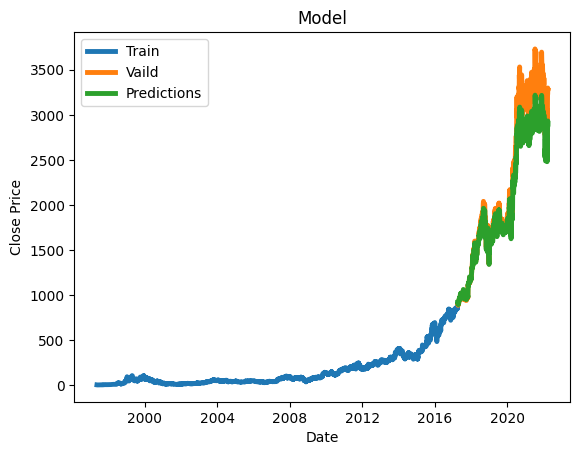

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure()
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'], linewidth=3.5)
plt.plot(valid[['Close', 'Predictions']], linewidth=3.5)
plt.legend(['Train', 'Vaild', 'Predictions'], loc='upper left')
plt.show()

In [19]:
valid

,Close,Predictions
Date,,
2017-04-06,898.280029,918.865906
2017-04-07,894.880005,906.597778
2017-04-10,907.039978,903.061340
2017-04-11,902.359985,916.407166
2017-04-12,896.229980,911.551514
...,...,...
2022-03-18,3225.010010,2832.978271
2022-03-21,3229.830078,2886.797852
2022-03-22,3297.780029,2875.033691


In [20]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
r2 = r2_score(y_test, predictions)
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The mean absolute error is {mae}.")
print(f"The model has an R-squared of {r2}.")

The mean squared error is 54104.765754421096.
The root mean squared error is 156.86053865508845.
The mean absolute error is 162.61549445475492.
The model has an R-squared of 0.9256549474452863
